# 2.栗まんじゅう問題

漫画ドラえもんには「バイバイン」という道具が登場する、2のn乗に関する有名なエピソード[1]があります。


[1] 藤子・Ｆ・不二雄(1979)『ドラえもん（１７）』小学館.


「バイバイン」は薬品で、これを振掛けるとその物体は5分ごとに倍に増えるという働きがあります。作中では栗まんじゅうを増やしますが、食べきれなくなったためロケットを使い宇宙に捨てました。


ここで度々話題になるのが、栗まんじゅうはその後宇宙でどのように増えていくのかについてです。様々な議論がされていますが、今回は単純に栗まんじゅうの体積がどう増えるかを計算してみましょう。

## 【問題】栗まんじゅうが太陽系を覆う日
1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは何分後でしょうか。これを計算するプログラムを作成してください。


栗まんじゅうや太陽系の体積を調査した上で仮定して計算してください。栗まんじゅうの隙間や重力などは考えず、問題を単純化して構いません。


ボールにバイバインを振りかけた時、東京ドームが一杯になる時間など他の状況にも適用できるような汎用的なプログラムを作成してください。また、グラフを表示するなど分かりやすいノートブックを作成してください。

In [53]:
# 体積一覧　太陽系：地球の1,304,000倍　　　　地球：1０8331978e+9　　東京ドーム：１２４００００
# 基準：メートル
import math

EARTH_VOLUME = 108331978e+9
SUN_VOLUME = EARTH_VOLUME * 1304000
TOKYODOME_VOLUME = 1240000
# print(SUN_VOLUME)

# 栗の体積　半径５ｃｍとする
MARON_VOLUME = 4 * 0.05**3 * math.pi / 3
cnt = 0

while MARON_VOLUME < SUN_VOLUME:
    MARON_VOLUME *= 2
    cnt += 1

print(cnt)

88


In [54]:
def baibain(small_volume, big_volume):
    cnt = 0
    transition_list = []

    while small_volume < big_volume:
        small_volume *= 2
        cnt += 1
        transition_list.append(small_volume)
        
    return cnt, transition_list


MARON_VOLUME = 4 * 0.05**3 * math.pi / 3
EARTH_VOLUME = 108331978e+9
SUN_VOLUME = EARTH_VOLUME * 1304000
TOKYODOME_VOLUME = 1240000
BALL_VOLUME = 4 * 0.07**3 * math.pi / 3

result, transition_list = baibain(MARON_VOLUME, SUN_VOLUME)

# print(transition_list)
print("バイバインをかけて{}分後に太陽系を埋め尽くす".format(result*5))

バイバインをかけて440分後に太陽系を埋め尽くす


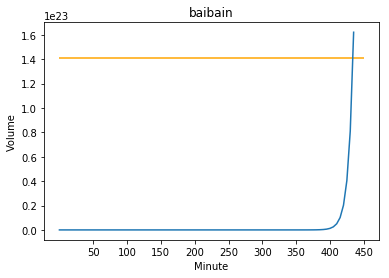

In [55]:
# グラフ描画

import matplotlib.pyplot as plt
%matplotlib inline

# minute_list = [x*5 for x in range(len(transition_list))]
# print(minute_list)
minute_list = [50, 100, 150, 200, 250, 300, 350, 400, 450]

plt.title("baibain")
plt.hlines(SUN_VOLUME, 0,90, color="orange")
plt.xlabel("Minute")
plt.ylabel("Volume")
plt.plot(transition_list)
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90], minute_list)
plt.show()


# TO:メンターへ

最終グラフ描画セルの３〜４行目のコメントアウトしている部分なのですが、
minute_list = [x*5 for x in range(len(transition_list))]
上記変数式は、cnt（カウント）を5分刻みとしたいため、cntの数だけ＊５をしたリストです。
これをグラフのｘ軸にしたかったのですが、うまくはめ込めず。汎用性のないコードになってしまいました。上部のminute_listは太陽系のものしか反映させられません。
何かいい方法がありましたらご教示頂けますと幸いです。
